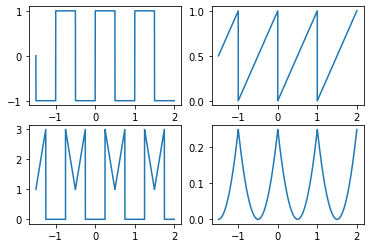

In [ ]:
# From https://dspillustrations.com/pages/posts/misc/fourier-series-and-harmonic-approximation.html

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Fs = 10000                           # Used later to set up the values in the x-coord of the functions 1,2,3,4 below:
func1 = lambda t: (abs((t%1)-0.25) < 0.25).astype(float) - (abs((t%1)-0.75) < 0.25).astype(float)    # Step function
func2 = lambda t: t % 1                                                                              # Saw function
func3 = lambda t: (abs((t%1)-0.5) < 0.25).astype(float) + 8*(abs((t%1)-0.5)) * (abs((t%1)-0.5)<0.25) # MMMM function
func4 = lambda t: ((t%1)-0.5)**2                                                                     # Parabolas
t = np.arange(-1.5, 2, 1/Fs)                           # Sets x-coord ranging from -1.5 to 2 at intervals of 1/10000.
plt.figure()
plt.subplot(221); plt.plot(t, func1(t))
plt.subplot(222); plt.plot(t, func2(t))
plt.subplot(223); plt.plot(t, func3(t))
plt.subplot(224); plt.plot(t, func4(t))
plt.show();

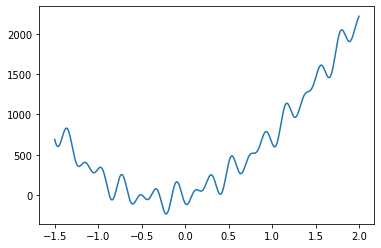

In [ ]:
# Example of wave in the temporal domain:
func_test1 = lambda t: 500 * t**2 - 50 * t**3 - 0.25 * t**4 - 100 * np.sin(20*t) - 100 * np.cos(30*t) + 300 * t
plt.figure()
plt.plot(t,func_test1(t))
plt.show();

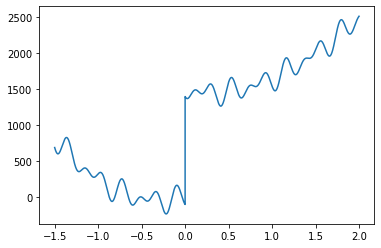

In [ ]:
# Wave with a step discontinuity to produce Gibbs phenomenon:
func_test = np.piecewise(t, [t<0, t>=0],
                [lambda t: 500 * t**2 - 50 * t**3 - 0.25 * t**4 - 100 * np.sin(20*t) - 100 * np.cos(30*t) + 300 * t,
                 lambda t: 500 * t**2 - 50 * t**3 - 0.25 * t**4 - 100 * np.sin(20*t) - 100 * np.cos(30*t) - 300 * t + 1500])
plt.figure()
plt.plot(t,func_test)
plt.show();

In [ ]:
# Calculating the Fourier coefficients with N harmonics:
def fourierSeries(period, N):
    result = []
    T = len(period)
    t = np.arange(T)
    for n in range(N+1):
        an = 2/T*(period * np.cos(2*np.pi*n*t/T)).sum()
        bn = 2/T*(period * np.sin(2*np.pi*n*t/T)).sum()
        result.append((an, bn))
    return np.array(result)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


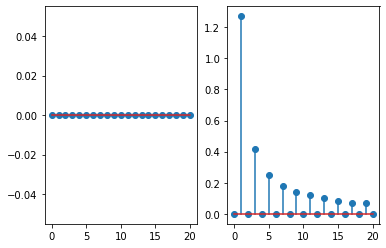

In [ ]:
# Fourier cos and sin coefficients for the wave function func1:
t_period = np.arange(0, 1, 1/Fs)
F = np.round(fourierSeries(func1(t_period), 20),2)
plt.subplot(121); plt.stem(F[:,0])
plt.subplot(122); plt.stem(F[:,1])
plt.show();

[ 0.  1.  1. ... -1. -1. -1.]
10000
[   0    1    2 ... 9997 9998 9999]
[1.         0.9999998  0.99999921 ... 0.99999822 0.99999921 0.9999998 ]
[ 0.          0.9999998   0.99999921 ... -0.99999822 -0.99999921
 -0.9999998 ]
6.821210263296962e-13


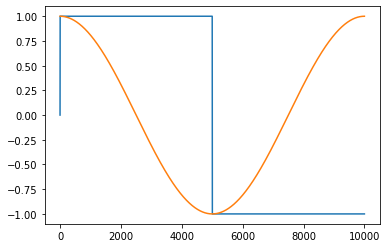

In [ ]:
# Some hacking of the functions above:
t_period = np.arange(0, 1, 1/Fs)              # Vector from 0 to 1 at 1/Fs intervals
period = func1(t_period)                      # func1 of t_period will yield a vector of real values.
print(period)
plt.plot(period)                              # Step function in blue.
T = len(period)                               # Number of elements in the vector "period".
print(T)
t = np.arange(T)                              # Vector from 0 to 9999 since T = 10,000.
print(t)
N =20
n = 1
print(np.cos(2*np.pi*n*t/T))                  # Vector with the y values of the function.
plt.plot(np.cos(2*np.pi*n*t/T))               # In green.
print(period * np.cos(2*np.pi*n*t/T))         # Multiplication entrywise of step function and cosine function
print((period * np.cos(2*np.pi*n*t/T)).sum()) # Dot product.
plt.show();

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


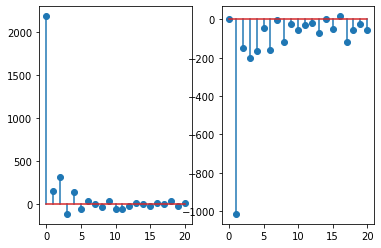

In [ ]:
# Fourier coefficients (cos and sin for function with step discontinuity)
F = np.round(fourierSeries(func_test, 20),2)
plt.subplot(121); plt.stem(F[:,0])
plt.subplot(122); plt.stem(F[:,1])
plt.show();

In [ ]:
# Reverse Fourier:
def reconstruct(P, anbn):
    result = 0
    t = np.arange(P)
    for n, (a, b) in enumerate(anbn):
        if n == 0:
            a = a/2
        result = result + a*np.cos(2*np.pi*n*t/P) + b * np.sin(2*np.pi*n*t/P)
    return result

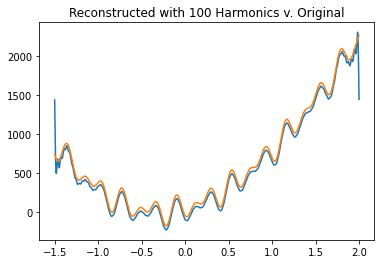

In [ ]:
# Comparing reconstructed Fourier in blue with original in green (original slightly offset upward):
t = np.arange(-1.5, 2, 1/Fs)
F = fourierSeries(func_test1(t), 100)

plt.plot(t, reconstruct(len(t), F[:100,:]));
plt.plot(t, func_test1(t) + 50)
plt.title('Reconstructed with 100 Harmonics v. Original')
plt.show();

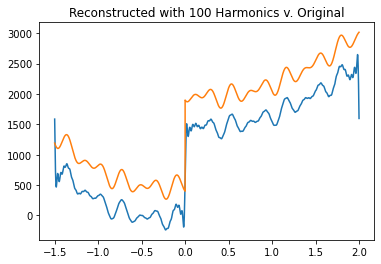

In [ ]:
# Reconstructed original function from Fourier coefficients with original offset upward for comparison:
# (Notice Gibbs phenomenon)
F = fourierSeries(func_test, 100)
plt.plot(t, reconstruct(len(t), F[:100,:]));
t = np.arange(-1.5, 2, 1/Fs)
plt.plot(t, func_test + 500)
plt.title('Reconstructed with 100 Harmonics v. Original')
plt.show();

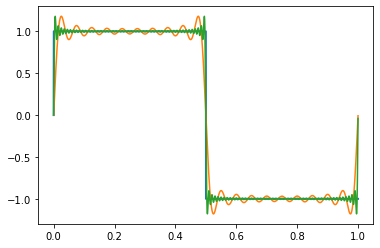

In [ ]:
# Same for step function at the beginning of the document for different number of harmonics:
F = fourierSeries(func1(t_period), 100)
plt.plot(t_period, func1(t_period), label='Original', lw=2)
plt.plot(t_period, reconstruct(len(t_period), F[:20,:]), label='Reconstructed with 20 Harmonics');
plt.plot(t_period, reconstruct(len(t_period), F[:100,:]), label='Reconstructed with 100 Harmonics');
plt.show();